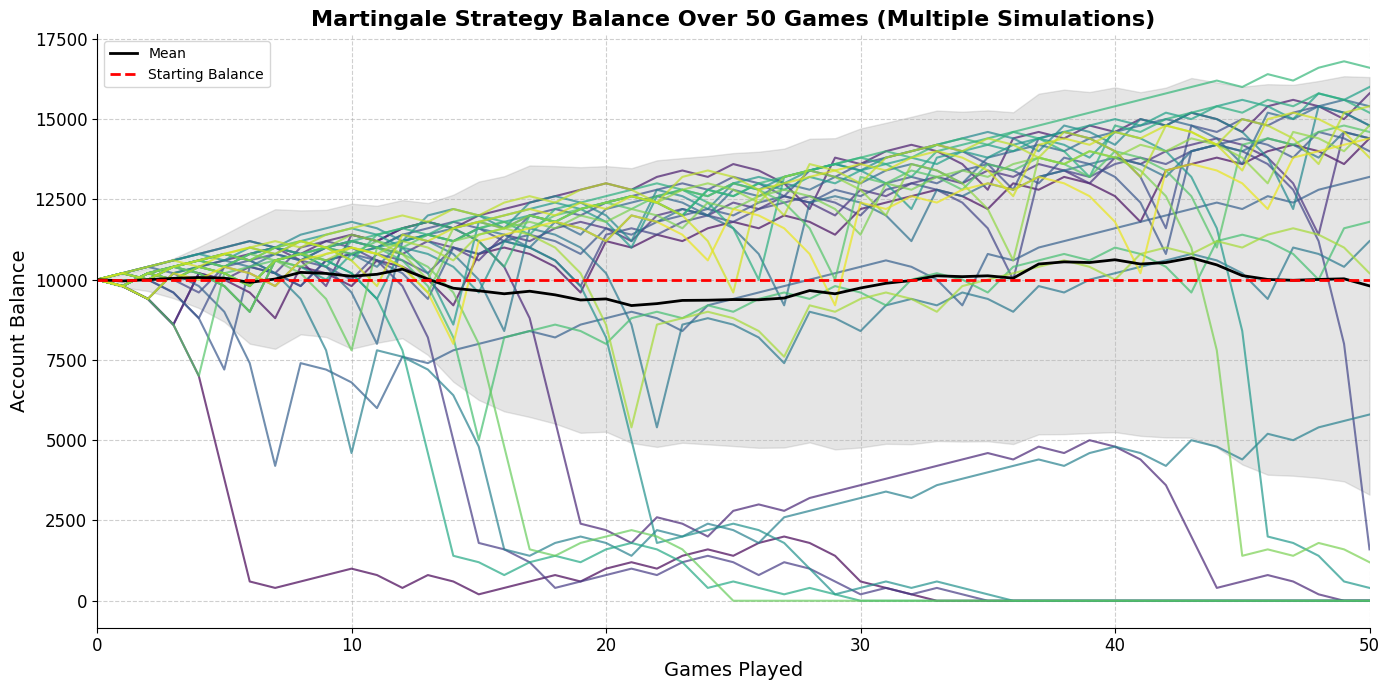

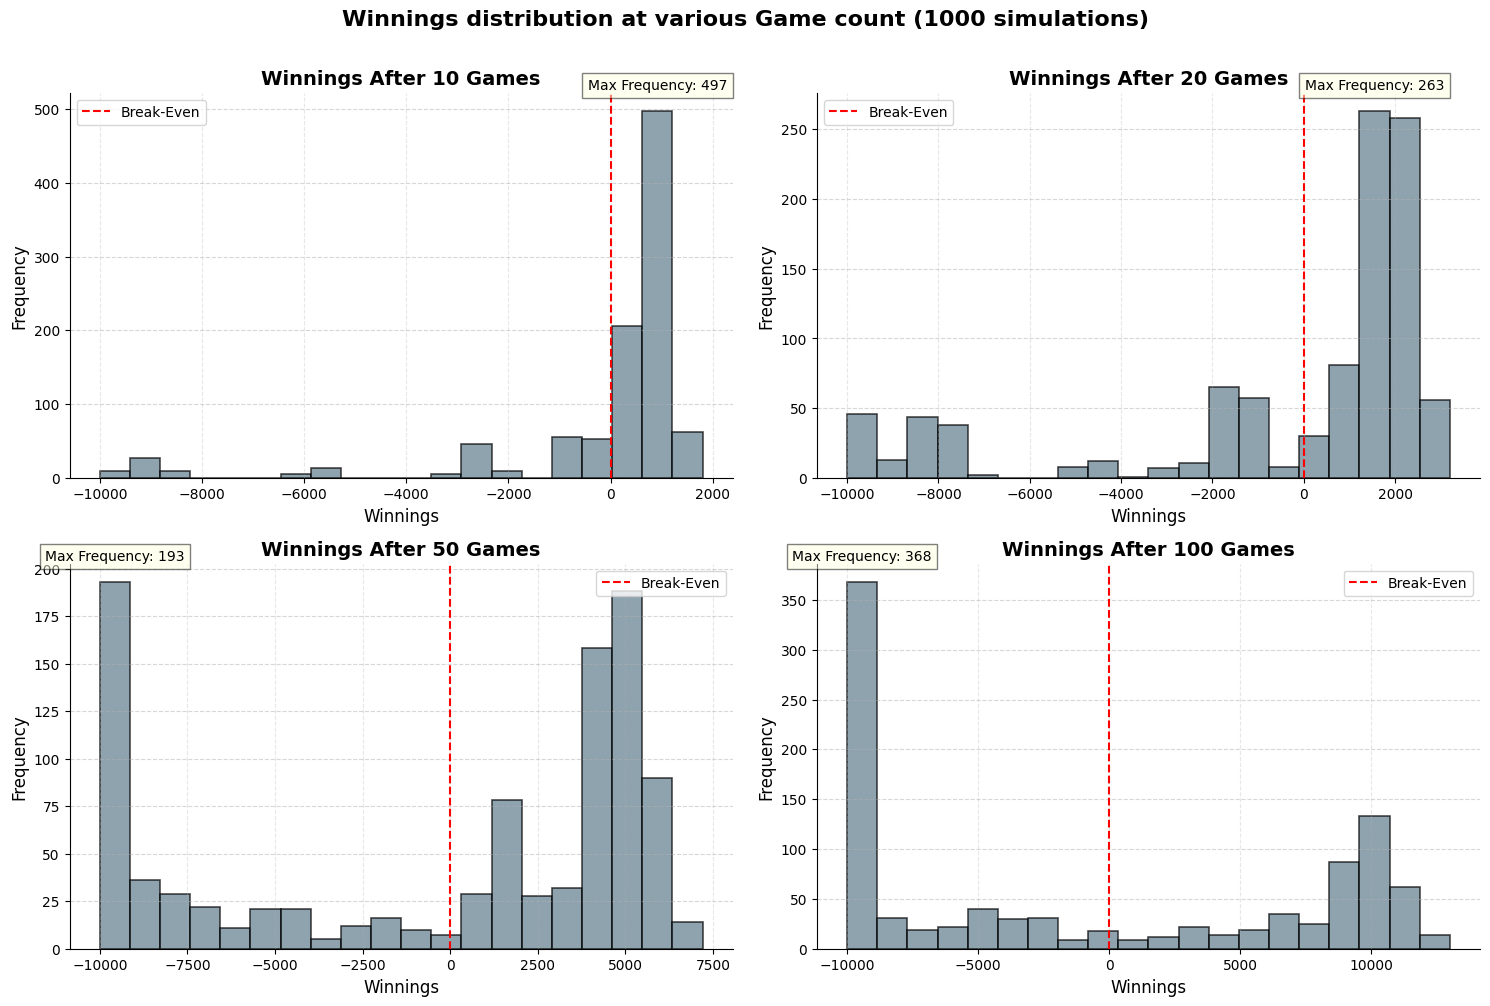

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_balance_histories(histories, num_games):
    """
    Plots the account balance over a specified number of games for multiple simulations,
    with enhanced styling and clarity.

    Args:
        histories: A list of lists, where each inner list represents the balance history for a single simulation.
        num_games: The total number of games played in each simulation.
    """

    plt.figure(figsize=(14, 7))  # Slightly wider figure for better visualization

    # --- Enhanced Styling and Plotting ---
    
    # Fix: Ensure all histories have the same length by padding shorter ones before plotting
    max_len = max(len(h) for h in histories)
    padded_histories = [np.pad(h, (0, max_len - len(h)), mode='edge') for h in histories]

    for i, history in enumerate(padded_histories):
        # Use semi-transparent lines with varying shades for each simulation
        color = plt.cm.viridis(i / len(histories))  # Colormap for varying shades
        plt.plot(history, color=color, alpha=0.7, linewidth=1.5)#, label=f'Simulation {i+1}')

    
    #Calculate mean and std
    all_balances = np.array(padded_histories)
    mean_balances = np.mean(all_balances, axis=0)
    std_balances = np.std(all_balances, axis=0)

    #Fix to avoid error
    min_length = min(len(mean_balances), num_games + 1)
    x_values = range(min_length)
    mean_balances = mean_balances[:min_length]
    std_balances = std_balances[:min_length]
    #Fill between standard deviation
    plt.fill_between(x_values, mean_balances - std_balances, mean_balances + std_balances, alpha=0.2, color='gray')
    
    #Plot the mean
    plt.plot(x_values,mean_balances, color='black', linewidth=2, linestyle='-', label="Mean")

    # Add a horizontal line at starting balance
    plt.axhline(y=10000, color='red', linestyle='--', linewidth=2, label='Starting Balance')

    # Add a subtle grid
    plt.grid(True, which='both', linestyle='--', alpha=0.6)

    # Set plot title and labels
    plt.title(f'Martingale Strategy Balance Over {num_games} Games (Multiple Simulations)', fontsize=16, fontweight='bold')
    plt.xlabel('Games Played', fontsize=14)
    plt.ylabel('Account Balance', fontsize=14)

    # Customize tick parameters
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Adjust plot limits
    plt.xlim(0, num_games)

    # Add legend
    plt.legend(loc='upper left')

    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.show()

def simulate_martingale(starting_balance, num_games, num_simulations, initial_bet):
  """Simulates the martingale strategy."""
  histories = []
  for _ in range(num_simulations):
    history = [starting_balance]
    balance = starting_balance
    bet = initial_bet
    for _ in range(num_games):
        if balance < bet:
            break
        if balance <= 0:
            break  # Stop if the balance is zero or negative
        # Simulate a coin flip (0 for loss, 1 for win)
        result = np.random.rand() < 0.486 
        if result == 1:  # Win
            balance += bet
            bet = initial_bet  # Reset bet after a win
        else:  # Loss
            balance -= bet
            if balance > 2 * bet:
                bet *= 2  # Double the bet after a loss
            elif balance < bet:
                bet = initial_bet
        history.append(balance)
    histories.append(history)
  return histories

def plot_histograms(histories, game_counts):
    """
    Plots histograms of winnings after a specified number of games, arranged in a 3x2 grid.

    Args:
        histories: A list of lists, where each inner list represents the history of winnings for a single simulation.
        game_counts: A list of integers, specifying the number of games to consider for each histogram.
    """

    num_plots = len(game_counts)
    num_rows = int(num_plots/2 + 1)
    num_cols = 2
    
    plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on the number of rows

    for i, num_games in enumerate(game_counts):
        plt.subplot(num_rows, num_cols, i + 1)
        winnings = [history[min(num_games - 1, len(history) - 1)] - 10000 for history in histories]

        # --- Enhanced Histogram Styling ---
        n, bins, patches = plt.hist(winnings, bins=20, alpha=0.7, edgecolor='black', linewidth=1.2, color='#607c8e')  # Added edgecolor, linewidth, and a custom color

        # Add a vertical line at zero to denote the break-even point
        plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5, label='Break-Even')

        # Add a subtle grid
        plt.grid(axis='y', alpha=0.5, linestyle='--')
        plt.grid(axis='x', alpha=0.3, linestyle='--')

        # Find the maximum frequency and add a text box
        max_frequency_index = np.argmax(n)
        max_frequency_value = int(n[max_frequency_index])
        max_frequency_bin_center = (bins[max_frequency_index] + bins[max_frequency_index+1])/2

        # Format the box
        plt.text(max_frequency_bin_center,max_frequency_value + max_frequency_value/20, f'Max Frequency: {max_frequency_value}', ha='center', va='bottom', bbox=dict(facecolor='lightyellow', alpha=0.5))


        plt.title(f'Winnings After {num_games} Games', fontsize=14, fontweight='bold')
        plt.xlabel('Winnings', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend()

        # Remove top and right spines for a cleaner look
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout and add space for suptitle
    plt.suptitle("Winnings distribution at various Game count (1000 simulations)", fontsize=16, fontweight='bold')
    plt.show()

if __name__ == "__main__":
    starting_balance = 10000
    num_games = 50
    simulations = 30
    initial_bet = 200

    # Simulate and plot balance histories
    balance_histories = simulate_martingale(starting_balance, num_games, simulations, initial_bet)
    plot_balance_histories(balance_histories, num_games)

    num_games = 150
    simulations = 1000
    game_counts = [10, 20, 50, 100]

    # Plot histograms for different game counts
    all_histories = simulate_martingale(starting_balance, max(game_counts), simulations, initial_bet)
    plot_histograms(all_histories, game_counts)

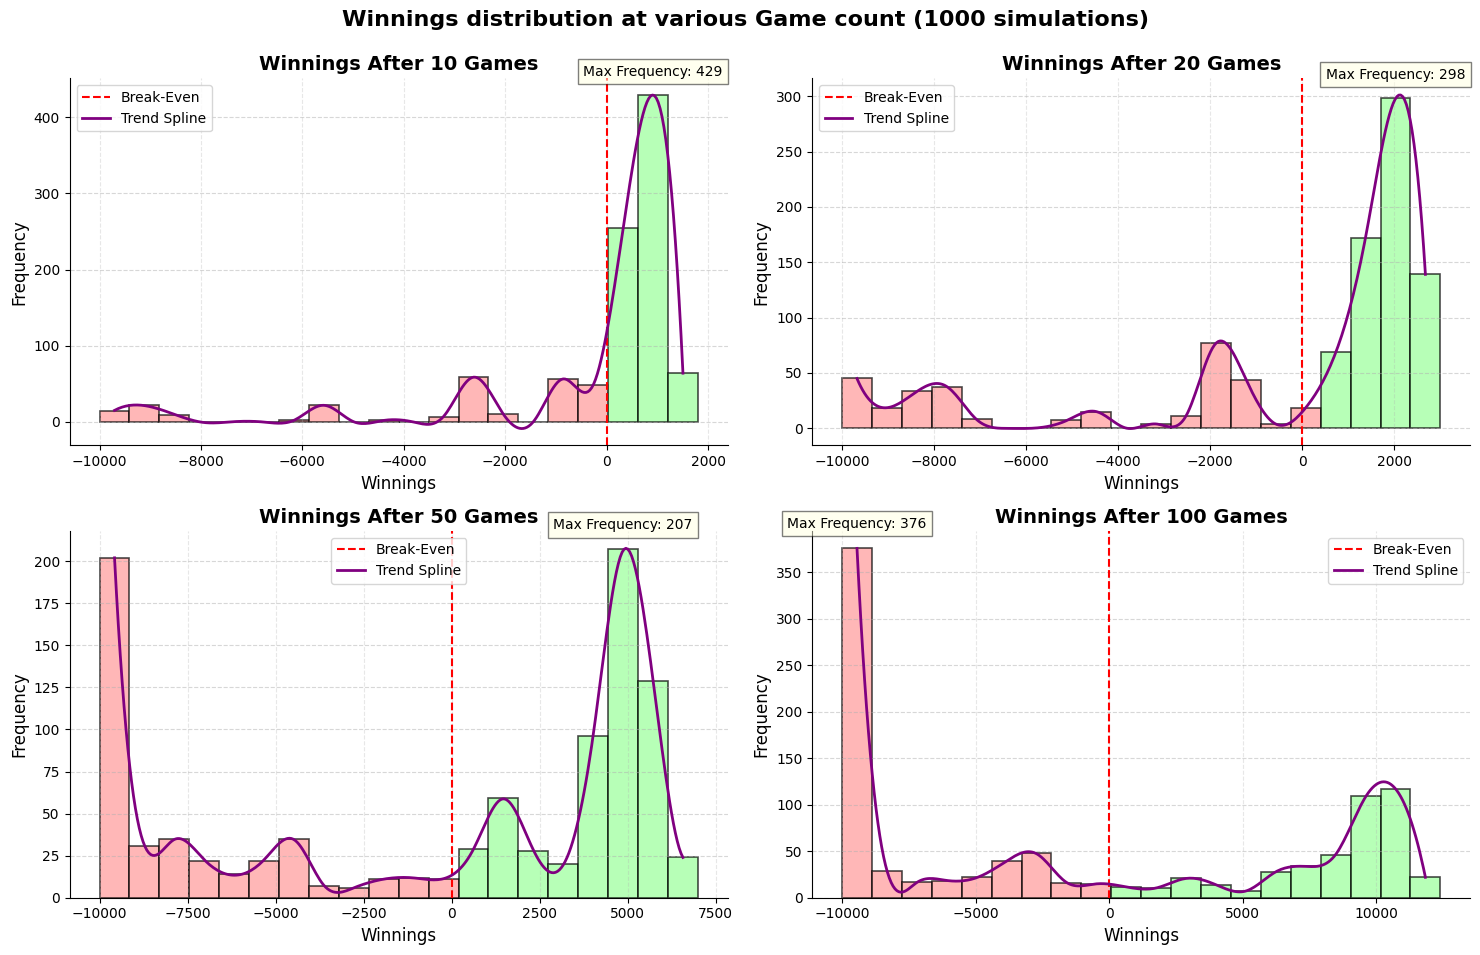

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline

def plot_histograms(histories, game_counts):
    """
    Plots histograms of winnings after a specified number of games, arranged in a 3x2 grid.

    Args:
        histories: A list of lists, where each inner list represents the history of winnings for a single simulation.
        game_counts: A list of integers, specifying the number of games to consider for each histogram.
    """

    num_plots = len(game_counts)
    num_rows = int(np.ceil(num_plots / 2))
    num_cols = 2

    plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on the number of rows

    for i, num_games in enumerate(game_counts):
        plt.subplot(num_rows, num_cols, i + 1)
        winnings = [history[min(num_games - 1, len(history) - 1)] - 10000 for history in histories]

        # --- Enhanced Histogram Styling ---
        n, bins, patches = plt.hist(winnings, bins=20, alpha=0.7, edgecolor='black', linewidth=1.2)  # Removed color for conditional coloring

        # Color the bars conditionally
        for patch, left, right in zip(patches, bins[:-1], bins[1:]):
            if left < 0:
                patch.set_facecolor('#ff9999')  # Light red
            else:
                patch.set_facecolor('#99ff99')  # Light green

        # Add a vertical line at zero to denote the break-even point
        plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5, label='Break-Even')

        # Add a subtle grid
        plt.grid(axis='y', alpha=0.5, linestyle='--')
        plt.grid(axis='x', alpha=0.3, linestyle='--')


        # Fit a spline to the histogram data
        bin_centers = (bins[:-1] + bins[1:]) / 2
        spline = UnivariateSpline(bin_centers, n, s=3)
        xs = np.linspace(bin_centers.min(), bin_centers.max(), 300)
        plt.plot(xs, spline(xs), color='purple', linestyle='-', linewidth=2, label='Trend Spline')

        # Find the maximum frequency and add a text box
        max_frequency_index = np.argmax(n)
        max_frequency_value = int(n[max_frequency_index])
        max_frequency_bin_center = (bins[max_frequency_index] + bins[max_frequency_index + 1]) / 2

        # Format the box
        plt.text(max_frequency_bin_center, max_frequency_value + max_frequency_value / 20,
                 f'Max Frequency: {max_frequency_value}', ha='center', va='bottom',
                 bbox=dict(facecolor='lightyellow', alpha=0.5))

        plt.title(f'Winnings After {num_games} Games', fontsize=14, fontweight='bold')
        plt.xlabel('Winnings', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend()

        # Remove top and right spines for a cleaner look
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout and add space for suptitle
    plt.suptitle("Winnings distribution at various Game count (1000 simulations)", fontsize=16, fontweight='bold')
    plt.show()

# Example usage
num_games = 150
simulations = 1000
game_counts = [10, 20, 50, 100]

# Assuming `simulate_martingale` is defined elsewhere
all_histories = simulate_martingale(starting_balance, max(game_counts), simulations, initial_bet)
plot_histograms(all_histories, game_counts)


In [13]:
num_games = 11
simulations = 1000

# Plot histograms for different game counts
all_histories = simulate_martingale(starting_balance, num_games, simulations, initial_bet)
winnings = [history[-1] - 10000 for history in all_histories]

In [15]:
# Calculate the percentage of winnings greater than or equal to 0
successful_simulations = sum(1 for win in winnings if win >= 0)
percentage_successful = (successful_simulations / simulations) * 100

print(f"Percentage of winnings greater than or equal to 0: {percentage_successful:.2f}%")

Percentage of winnings greater than or equal to 0: 79.10%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Simulation parameters
simulations = 1000
starting_balance = 10000
num_games_list = range(1, 100, 1)
percentage_success_list = []

# Simulate the Martingale strategy
for num_games in num_games_list:
    all_histories = simulate_martingale(starting_balance, num_games, simulations, initial_bet)
    winnings = [history[-1] - starting_balance for history in all_histories]
    successful_simulations = sum(1 for win in winnings if win >= 0)
    percentage_successful = (successful_simulations / simulations) * 100
    percentage_success_list.append(percentage_successful)


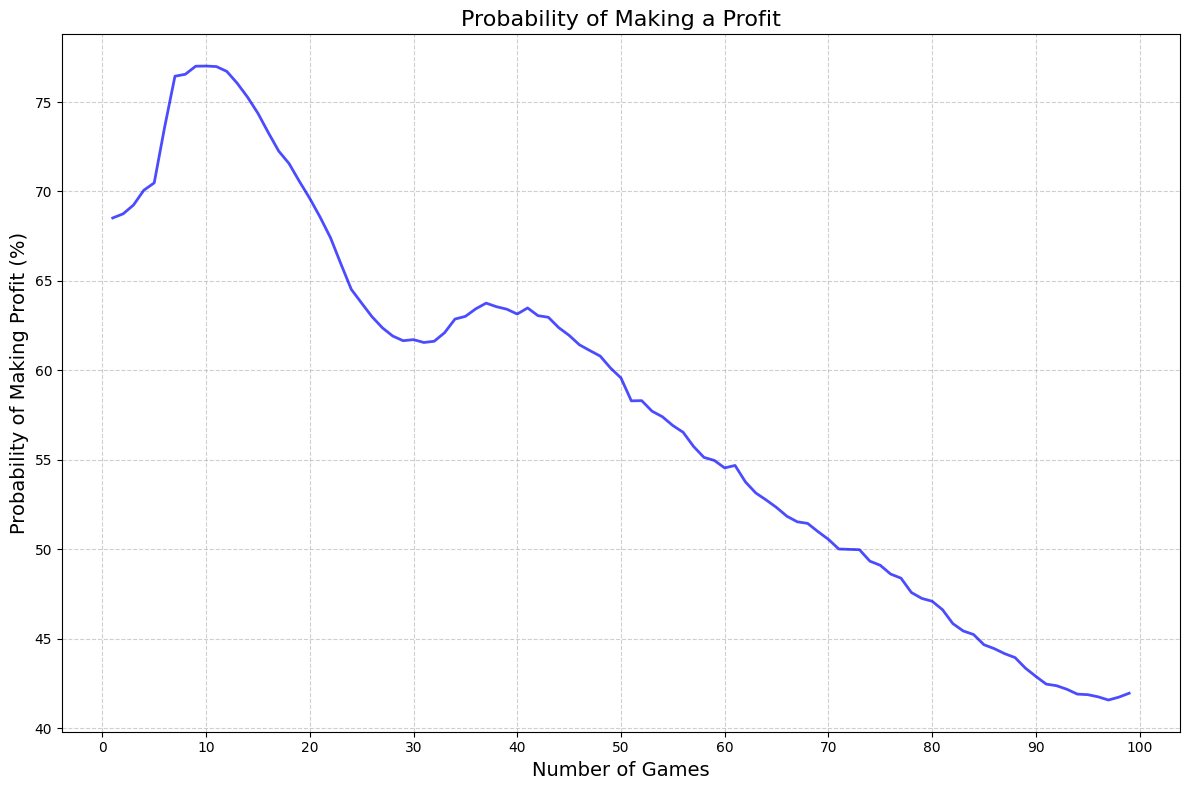

In [14]:

# Smooth the data using a uniform filter
smoothed_percentage_success_list = uniform_filter1d(percentage_success_list, size=10)

# Plot the smoothed data
plt.figure(figsize=(12, 8))
plt.plot(num_games_list, smoothed_percentage_success_list, color='blue', linestyle='-', linewidth=2, markersize=5, alpha=0.7)
plt.title('Probability of Making a Profit', fontsize=16)
plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Probability of Making Profit (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(0, 101, 10))
plt.tight_layout()
plt.show()

In [32]:
from scipy.interpolate import make_interp_spline
# --- Smoothing and Plotting ---

# Smoothing Coefficient (adjust for more/less smoothing)
smoothing_coefficient = 30  # Experiment with values like 10, 20, 50, etc.

# Create a smoother x-axis for interpolation
x_smooth = np.linspace(min(num_games_list), max(num_games_list), smoothing_coefficient*len(num_games_list))

# Create a spline interpolation
spl = make_interp_spline(num_games_list, percentage_success_list, k=3)  # k=3 is cubic spline
y_smooth = spl(x_smooth)

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, color='blue', label='Smoothed Probability')  # Smoothed line
plt.scatter(num_games_list, percentage_success_list, color='red', marker='o', s=20, label='Simulated Data') #Original points
plt.title('Probability of Making a Profit with Smoothed Curve')
plt.xlabel('Number of Games')
plt.ylabel('Probability of Making Profit (%)')
plt.grid(True)
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'scipy'